# Nehla Shajahan case study 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [4]:
data = pd.read_csv('mobile_price.csv')

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data.shape

(2000, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

No categorical variables present.

# Plotting a counterplot of the target variable 

In [8]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

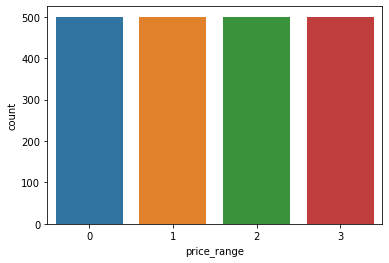

In [9]:
sns.countplot("price_range",data=data)

In [11]:
data['price_range'].value_counts(normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
Name: price_range, dtype: float64

So we are given with a multi-class classification problem with 4 class equally distributed.

# Looking for null values


In [13]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No null values present in this dataset

# Splitting the dataset

In [24]:
x = data.drop(['price_range'], axis=1)
y = data.iloc[:, data.columns=='price_range']

In [25]:
x.shape

(2000, 20)

In [26]:
y.shape

(2000, 1)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [29]:
x_train.shape


(1600, 20)

In [30]:
y_train.shape

(1600, 1)

# BUILDING VARIOUS MODELS

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
logist_model = LogisticRegression()
logist_model.fit(x_train, y_train)
y_pred = logist_model.predict(x_test)

C:\Users\Nehla Shajahan\New folder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Nehla Shajahan\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score , accuracy_score, precision_score, classification_report

In [36]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy is: 0.6325
Weighted F1-score: 0.63

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400



CONFUSION MATRIX

In [37]:
confusion_matrix(y_test, y_pred)

array([[79, 25,  1,  0],
       [17, 46, 20,  8],
       [ 0, 17, 46, 29],
       [ 0,  1, 29, 82]], dtype=int64)

Logistic Regression model gives us an accuracy of 63.25%

# KNN model

In [43]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

<ipython-input-43-a9de13d2cf72>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)
<ipython-input-43-a9de13d2cf72>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)
<ipython-input-43-a9de13d2cf72>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)
<ipython-input-43-a9de13d2cf72>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)
<ipython-input-43-a9de13d2cf72>:6: DataConversionWarning: A column-vector y was passed when a 1d

In [44]:
acc_values

[0.9275,
 0.93,
 0.9425,
 0.9425,
 0.955,
 0.94,
 0.955,
 0.95,
 0.95,
 0.9425,
 0.95,
 0.94]

Text(0, 0.5, 'Accuracy')

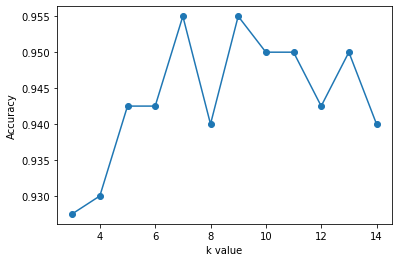

In [45]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [47]:
classifier = KNeighborsClassifier(n_neighbors= 10, metric= 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

<ipython-input-47-aad43a29d929>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)


In [48]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Accuracy is: 0.95
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.93      0.96      0.94        91
           2       0.89      0.92      0.91        92
           3       1.00      0.92      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [49]:
confusion_matrix(y_test, y_pred)

array([[105,   0,   0,   0],
       [  3,  87,   1,   0],
       [  0,   7,  85,   0],
       [  0,   0,   9, 103]], dtype=int64)

KNN model gives us an accuracy of 95%

# SVM model

In [50]:
from sklearn.svm import SVC

In [52]:
svm=SVC()
svm.fit(x_train, y_train)
y_pred_svm=svm.predict(x_test)

C:\Users\Nehla Shajahan\New folder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [54]:
print('Accuracy is:', accuracy_score(y_test,y_pred_svm))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_svm, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_svm))
print('\nConfusion Matrix\n')
confusion_matrix(y_test, y_pred_svm)


Accuracy is: 0.965
Weighted F1-score: 0.97

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400


Confusion Matrix



array([[103,   2,   0,   0],
       [  1,  90,   0,   0],
       [  0,   3,  87,   2],
       [  0,   0,   6, 106]], dtype=int64)

So SVM model gives us an accuracy of 96.5%

# Decision Tree model

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

In [57]:
print('Accuracy is:', accuracy_score(y_test,y_pred_dt))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_dt, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_dt))
print('\nConfusion Matrix\n')
confusion_matrix(y_test, y_pred_dt)


Accuracy is: 0.8325
Weighted F1-score: 0.83

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       105
           1       0.74      0.87      0.80        91
           2       0.77      0.68      0.72        92
           3       0.87      0.89      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400


Confusion Matrix



array([[ 91,  14,   0,   0],
       [  5,  79,   7,   0],
       [  0,  14,  63,  15],
       [  0,   0,  12, 100]], dtype=int64)

Decision tree model gave us an accuracy of 83%

# Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

<ipython-input-60-c49329166830>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


In [61]:
print('Accuracy is:', accuracy_score(y_test,y_pred_rf))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_rf, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_rf))
print('\nConfusion Matrix\n')
confusion_matrix(y_test, y_pred_rf)


Accuracy is: 0.8625
Weighted F1-score: 0.86

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.84      0.84      0.84        91
           2       0.75      0.80      0.77        92
           3       0.92      0.85      0.88       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400


Confusion Matrix



array([[100,   5,   0,   0],
       [  7,  76,   8,   0],
       [  0,  10,  74,   8],
       [  0,   0,  17,  95]], dtype=int64)

Random Forest Model gave us an accuracy of 86%

# Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb=gb.predict (x_test)

C:\Users\Nehla Shajahan\New folder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [63]:
print('Accuracy is:', accuracy_score(y_test,y_pred_gb))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_gb, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_gb))
print('\nConfusion Matrix\n')
confusion_matrix(y_test, y_pred_gb)

Accuracy is: 0.905
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.90      0.90        91
           2       0.82      0.86      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400


Confusion Matrix



array([[101,   4,   0,   0],
       [  4,  82,   5,   0],
       [  0,   6,  79,   7],
       [  0,   0,  12, 100]], dtype=int64)

Gradient boosting gave us an accuracy of 90.5%

In [64]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Standard Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [66]:
logist_model = LogisticRegression()
logist_model.fit(x_train, y_train)
y_pred = logist_model.predict(x_test)

C:\Users\Nehla Shajahan\New folder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [67]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix\n')
confusion_matrix(y_test, y_pred)

Accuracy is: 0.9525
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       0.92      0.98      0.95        91
           2       0.91      0.90      0.91        92
           3       0.99      0.93      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400


Confusion Matrix



array([[105,   0,   0,   0],
       [  2,  89,   0,   0],
       [  0,   8,  83,   1],
       [  0,   0,   8, 104]], dtype=int64)

After standard scaling, logistic regression gave us an accuracy of 95.25%

In [69]:
svm=SVC()
svm.fit(x_train, y_train)
y_pred_svm=svm.predict(x_test)

C:\Users\Nehla Shajahan\New folder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [70]:
print('Accuracy is:', accuracy_score(y_test,y_pred_svm))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_svm, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_svm))
print('\nConfusion Matrix\n')
confusion_matrix(y_test, y_pred_svm)

Accuracy is: 0.8825
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.81      0.89      0.85        91
           2       0.82      0.80      0.81        92
           3       0.96      0.88      0.92       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400


Confusion Matrix



array([[100,   5,   0,   0],
       [  8,  81,   2,   0],
       [  0,  14,  74,   4],
       [  0,   0,  14,  98]], dtype=int64)

Now, SVM gives us 88% accuracy

In [71]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)
print('Accuracy is:', accuracy_score(y_test,y_pred_dt))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_dt, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_dt))
print('\nConfusion Matrix\n')
confusion_matrix(y_test, y_pred_dt)

Accuracy is: 0.8375
Weighted F1-score: 0.84

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       105
           1       0.74      0.86      0.79        91
           2       0.79      0.73      0.76        92
           3       0.91      0.87      0.89       112

    accuracy                           0.84       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400


Confusion Matrix



array([[93, 12,  0,  0],
       [ 9, 78,  4,  0],
       [ 0, 15, 67, 10],
       [ 0,  1, 14, 97]], dtype=int64)

Decision Tree model gives us an accuracy of 83.75%

In [72]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('Accuracy is:', accuracy_score(y_test,y_pred_rf))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_rf, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_rf))
print('\nConfusion Matrix\n')
confusion_matrix(y_test, y_pred_rf)


<ipython-input-72-5da99965573f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Accuracy is: 0.86
Weighted F1-score: 0.86

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       105
           1       0.82      0.85      0.83        91
           2       0.74      0.79      0.77        92
           3       0.95      0.82      0.88       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400


Confusion Matrix



array([[102,   3,   0,   0],
       [  9,  77,   5,   0],
       [  0,  14,  73,   5],
       [  0,   0,  20,  92]], dtype=int64)

Random Forest gives an accuracy of 86%

In [73]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb=gb.predict (x_test)
print('Accuracy is:', accuracy_score(y_test,y_pred_gb))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_gb, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_gb))
print('\nConfusion Matrix\n')
confusion_matrix(y_test, y_pred_gb)

C:\Users\Nehla Shajahan\New folder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy is: 0.9025
Weighted F1-score: 0.90

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.88      0.93      0.90        91
           2       0.80      0.85      0.83        92
           3       0.95      0.86      0.90       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.90      0.90       400


Confusion Matrix



array([[102,   3,   0,   0],
       [  3,  85,   3,   0],
       [  0,   9,  78,   5],
       [  0,   0,  16,  96]], dtype=int64)

Gradient Boosting gives a 90% accuracy after standard scaling.

# So we can conclude that Logistic Regression is the most suitable model for this dataset